In [1]:
import numpy as np


In [2]:
# States
states = ['S1', 'S2', 'S3', 'S4']   # /h/, /e/, /l/, /o/
observations = ['O1', 'O2', 'O3', 'O4']
# Observation sequence
O = ['O1', 'O2', 'O3', 'O4']

In [3]:
# Transition Probability Matrix A
A = np.array([
    [0.0, 0.7, 0.3, 0.0],  # S1 -> ...
    [0.0, 0.2, 0.6, 0.2],  # S2 -> ...
    [0.0, 0.0, 0.3, 0.7],  # S3 -> ...
    [0.0, 0.0, 0.1, 0.9],  # S4 -> ...
])

# Emission Probability Matrix B
B = np.array([
    [0.6, 0.2, 0.1, 0.1],  # S1 emits O1..O4
    [0.1, 0.7, 0.1, 0.1],
    [0.1, 0.1, 0.6, 0.2],
    [0.2, 0.1, 0.2, 0.5],
])


In [4]:
# Initial probabilities π
pi = np.array([1.0, 0.0, 0.0, 0.0])

# Mapping
state_index = {s: i for i, s in enumerate(states)}
obs_index = {o: i for i, o in enumerate(observations)}

In [5]:
# Viterbi tables
T = len(O)
N = len(states)
viterbi = np.zeros((N, T))
backpointer = np.zeros((N, T), dtype=int)

# Initialization
for s in range(N):
    viterbi[s, 0] = pi[s] * B[s, obs_index[O[0]]]
    backpointer[s, 0] = 0

In [6]:
# Recursion
for t in range(1, T):
    for s in range(N):
        trans_probs = viterbi[:, t-1] * A[:, s]
        best_prev_state = np.argmax(trans_probs)
        viterbi[s, t] = trans_probs[best_prev_state] * B[s, obs_index[O[t]]]
        backpointer[s, t] = best_prev_state

In [7]:
# Traceback
best_last_state = np.argmax(viterbi[:, -1])
best_prob = viterbi[best_last_state, -1]

best_path = [best_last_state]
for t in range(T-1, 0, -1):
    best_path.insert(0, backpointer[best_path[0], t])

decoded_states = [states[i] for i in best_path]
phonemes = {
    'S1': '/h/',
    'S2': '/e/',
    'S3': '/l/',
    'S4': '/o/'
}
decoded_phonemes = [phonemes[s] for s in decoded_states]

print("Most likely state sequence:", decoded_states)
print("Phoneme sequence:", decoded_phonemes)
print("Probability of this sequence:", best_prob)

Most likely state sequence: ['S1', 'S2', 'S3', 'S4']
Phoneme sequence: ['/h/', '/e/', '/l/', '/o/']
Probability of this sequence: 0.03704399999999999


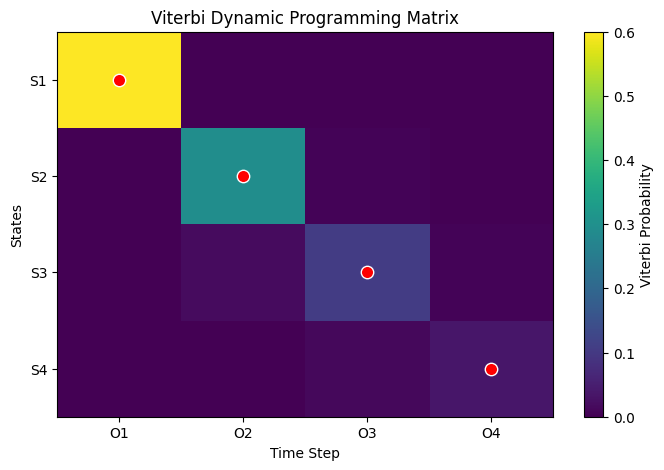

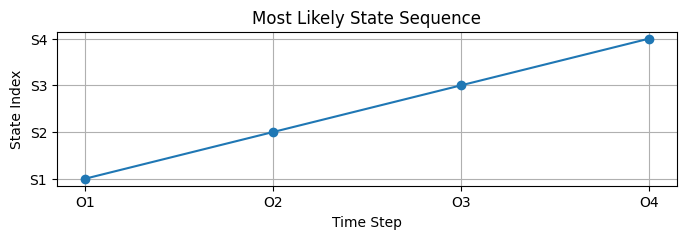

In [8]:
import matplotlib.pyplot as plt

# --- Viterbi Matrix Visualization ---
plt.figure(figsize=(8, 5))
plt.imshow(viterbi, cmap='viridis', aspect='auto')
plt.colorbar(label='Viterbi Probability')

plt.xticks(range(T), O)
plt.yticks(range(N), states)

plt.title("Viterbi Dynamic Programming Matrix")
plt.xlabel("Time Step")
plt.ylabel("States")

# Highlight the best path
for t, s in enumerate(best_path):
    plt.scatter(t, s, color='red', s=80, edgecolors='white')

plt.show()


# --- State Path Visualization ---
plt.figure(figsize=(8, 2))
plt.plot(best_path, marker='o')
plt.yticks(range(N), states)
plt.xticks(range(T), O)
plt.title("Most Likely State Sequence")
plt.xlabel("Time Step")
plt.ylabel("State Index")
plt.grid(True)
plt.show()
